<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> Analyzing Call Center Performance </div> -->



<h1 style='background:#0f403f; border:0; color:#ebac8c'><center>CALL VOLUME FORECAST TELECOMUNICATION INDUSTRY</center></h1> 

<center>
<img style="align:center;" src="https://www.contactspace.com/wp-content/uploads/call-centre-forecasting-min-scaled.jpeg" width=900>
</center>

<!-- <div style="padding:20px; 
            color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500;
            width:1300px;
            height:500px"> TABLE OF CONTENT</div> -->




                      
</div>


<a id='1'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> IMPORTING LIBRARIES</div> -->

<h1 style='background:#0f403f; border:0; color:#ebac8c'><center>IMPORTING LIBRARIES</center></h1> 


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split as tts 
from sklearn.metrics import r2_score
import os

In [4]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
from sklearn.metrics import mean_squared_error

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [7]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

<a id='2'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> LOADING DATASET</div> -->
<h1 style='background:#0f403f; border:0; color:#ebac8c'><center>LOADING DATASET</center></h1> 

In [8]:
data_calls = pd.read_csv('case_data_calls.csv', delimiter=';')
data_reservations = pd.read_csv('case_data_reservations.csv', delimiter=';')

In [9]:
data_calls.head().style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white'})

,date,calls,weekday
0,1-1-2013,2429,2
1,2-1-2013,3881,3
2,3-1-2013,3560,4
3,4-1-2013,3155,5
4,5-1-2013,1538,6


In [10]:
data_reservations.head().style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white'})

,date,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day
0,1-1-2014,1494,7794,0,1,1
1,2-1-2014,2891,20074,0,1,0
2,3-1-2014,2790,17905,0,1,0
3,4-1-2014,2504,10880,0,0,0
4,5-1-2014,1522,8333,0,0,0


In [11]:
df1 = data_calls.merge(data_reservations, left_on='date', right_on='date')
df=df1.copy()
df.head().style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white'})

,date,calls,weekday,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day
0,1-1-2014,1327,3,1494,7794,0,1,1
1,2-1-2014,3417,4,2891,20074,0,1,0
2,3-1-2014,3178,5,2790,17905,0,1,0
3,4-1-2014,1767,6,2504,10880,0,0,0
4,5-1-2014,1374,7,1522,8333,0,0,0


<a id='3'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> DATA DESCRIPTION</div> -->
<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>CALL DATA DESCRIPTION</center></h1> 


## Data Description Summary for Call Volume Forecast Project

### Dataset Overview

This project combines two datasets related to call center operations:

- **case_data_calls.csv** — Contains daily call volume data  
- **case_data_reservations.csv** — Contains reservation data that may influence call volume  

The datasets are joined on the **date** field, which follows a day-month-year format (e.g., 1-1-2013).

### Variables Description

**case_data_calls.csv**  
- `date`: Date of record (day-month-year format)  
- `calls`: Number of calls received (integer)  
- `weekday`: Day of week (1 = Monday through 7 = Sunday)  

**case_data_reservations.csv**  
- `date`: Date of record (day-month-year format)  
- `reservations_2months_advance`: Number of reservations made 2 months in advance (integer)  
- `total_reservations`: Total number of reservations (integer)  
- `summer_break`: Binary indicator for summer break period (0 = no, 1 = yes)  
- `christmas_break`: Binary indicator for Christmas break period (0 = no, 1 = yes)  
- `special_day`: Binary indicator for special days/holidays (0 = no, 1 = yes)  

### Time Period Covered

- Data spans from **January 1, 2013** to **February 29, 2016** (~3 years and 2 months of daily data).

### Key Observations

- The dataset includes both call volume metrics and potential predictors such as reservations and seasonal indicators.  
- Weekday information is encoded numerically (1–7) rather than as categorical strings.  
- Seasonal patterns are marked with binary flags for summer and Christmas breaks.  
- Special days/holidays are flagged but not explicitly named.  
- Reservation data includes both short-term (2 months in advance) and total reservation counts.  

### Potential Use Cases

This combined dataset can be used for:  
- Time series forecasting of call volumes  
- Understanding how reservations impact call center demand  
- Analyzing seasonal patterns in call center operations  
- Identifying special days with unusually high or low call volumes  

### Data Quality Notes

- The date format is consistent across both datasets.  
- No missing values are immediately apparent in the sample data.  
- Weekday encoding follows ISO standards (Monday = 1).  
- Binary flags appear to be properly encoded as 0/1.  

---


<a id='4'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> EXPLORATORY DATA ANALYSIS</div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>EXPLORATORY ANALYSIS</center></h1> 

In [12]:
# Basic info
print('Shape of the data:',df.shape)
print("****************************")
print('Columns of the data:',df.columns.tolist())
print("****************************")
print('Number of unique values:',df.nunique())
print("****************************")
print('Number of duplicated values:',df.duplicated().sum())
print("****************************")

Shape of the data: (790, 8)
****************************
Columns of the data: ['date', 'calls', 'weekday', 'reservations_2months_advance', 'total_reservations', 'summer_break', 'christmas_break', 'special_day']
****************************
Number of unique values: date                            790
calls                           752
weekday                           7
reservations_2months_advance    753
total_reservations              785
summer_break                      2
christmas_break                   2
special_day                       2
dtype: int64
****************************
Number of duplicated values: 0
****************************


In [13]:
df.dtypes

date                            object
calls                            int64
weekday                          int64
reservations_2months_advance     int64
total_reservations               int64
summer_break                     int64
christmas_break                  int64
special_day                      int64
dtype: object

In [14]:
df.describe()

,calls,weekday,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day
count,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000
mean,4733.030380,4.002532,4558.364557,27689.987342,0.155696,0.035443,0.039241
std,2131.641784,2.001265,2339.046454,12657.335897,0.362797,0.185014,0.194290
min,1059.000000,1.000000,965.000000,6507.000000,0.000000,0.000000,0.000000
25%,3178.250000,2.000000,2914.250000,18434.250000,0.000000,0.000000,0.000000
50%,4397.000000,4.000000,4034.500000,25819.000000,0.000000,0.000000,0.000000
75%,5868.000000,6.000000,5661.750000,34496.750000,0.000000,0.000000,0.000000
max,12864.000000,7.000000,17681.000000,79727.000000,1.000000,1.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790 entries, 0 to 789
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   date                          790 non-null    object
 1   calls                         790 non-null    int64 
 2   weekday                       790 non-null    int64 
 3   reservations_2months_advance  790 non-null    int64 
 4   total_reservations            790 non-null    int64 
 5   summer_break                  790 non-null    int64 
 6   christmas_break               790 non-null    int64 
 7   special_day                   790 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 55.5+ KB


<a id='#6'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> MISSING VALUES</div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>MISSING VALUES</center></h1> 

In [16]:
# Check missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing_values[missing_values > 0])
print("****************************")

Missing Values:
 Series([], dtype: int64)
****************************


In [17]:
df.isnull().sum()

date                            0
calls                           0
weekday                         0
reservations_2months_advance    0
total_reservations              0
summer_break                    0
christmas_break                 0
special_day                     0
dtype: int64

In [18]:
# show the missing values in dataset with ratio
def missing_values_tabl(df):
    
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio,2)], axis=1, keys=['n_miss', 'ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

missing_values_tabl(df)

,n_miss,ratio


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'date'),
  Text(1.5, 0, 'calls'),
  Text(2.5, 0, 'weekday'),
  Text(3.5, 0, 'reservations_2months_advance'),
  Text(4.5, 0, 'total_reservations'),
  Text(5.5, 0, 'summer_break'),
  Text(6.5, 0, 'christmas_break'),
  Text(7.5, 0, 'special_day')])

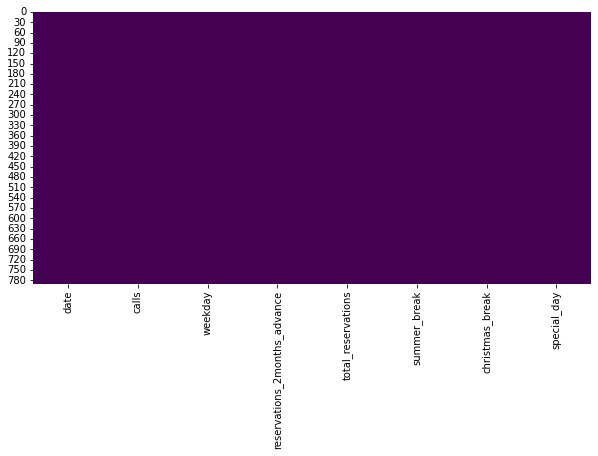

In [19]:
# visualize the missing values with heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.xticks(rotation=90)

In [20]:
# handling the missing values by using KNN imputer
num=df.select_dtypes(include=['float64','int64'])
for i in df.columns:
    if df[i].isnull().sum()>len(df)*0.90:
        df.drop(i,axis=1,inplace=True)
df.isnull().sum()

date                            0
calls                           0
weekday                         0
reservations_2months_advance    0
total_reservations              0
summer_break                    0
christmas_break                 0
special_day                     0
dtype: int64

In [21]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=15)
num=df.select_dtypes(include=['float64','int64'])    
for i in num.columns:
   df[i]=knn.fit_transform(df[[i]])
      
df.isnull().sum()

date                            0
calls                           0
weekday                         0
reservations_2months_advance    0
total_reservations              0
summer_break                    0
christmas_break                 0
special_day                     0
dtype: int64

<a id='5'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> EXPLOROTORY DATA ANALYSIS (EDA) </div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>EXPLORATORY DATA ANALYSIS (EDA)</center></h1> 

## Data Preparation and Feature Engineering

- Converted the `date` column from string to `datetime` format to enable time series analysis.
- Extracted additional date-related features such as:
  - Day of the week (numeric and name)
  - Quarter, month, year, and day of the month
- Renamed columns (`date` to `ds`, `calls` to `y`) to comply with Prophet’s expected input format.
- These features help understand seasonality and trends in call volume.


In [24]:
df.head().style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white'})

,date,calls,weekday,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day
0,1-1-2014,1327.000000,3.000000,1494.000000,7794.000000,0.000000,1.000000,1.000000
1,2-1-2014,3417.000000,4.000000,2891.000000,20074.000000,0.000000,1.000000,0.000000
2,3-1-2014,3178.000000,5.000000,2790.000000,17905.000000,0.000000,1.000000,0.000000
3,4-1-2014,1767.000000,6.000000,2504.000000,10880.000000,0.000000,0.000000,0.000000
4,5-1-2014,1374.000000,7.000000,1522.000000,8333.000000,0.000000,0.000000,0.000000


In [25]:
# Convert 'date' column to datetime format (day-month-year)
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Extract datetime features for richer analysis
df['day_of_week_num'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
df['weekday_name'] = df['date'].dt.day_name()
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day'] = df['date'].dt.day

# Prepare data for time series modeling with Prophet
df.rename(columns={'date': 'ds', 'calls': 'y'}, inplace=True)

# --- Initial Data Exploration ---

print(df.describe())
print(df.info())

                  y     weekday  reservations_2months_advance  \
count    790.000000  790.000000                    790.000000   
mean    4733.030380    4.002532                   4558.364557   
std     2131.641784    2.001265                   2339.046454   
min     1059.000000    1.000000                    965.000000   
25%     3178.250000    2.000000                   2914.250000   
50%     4397.000000    4.000000                   4034.500000   
75%     5868.000000    6.000000                   5661.750000   
max    12864.000000    7.000000                  17681.000000   

       total_reservations  summer_break  christmas_break  special_day  \
count          790.000000    790.000000       790.000000   790.000000   
mean         27689.987342      0.155696         0.035443     0.039241   
std          12657.335897      0.362797         0.185014     0.194290   
min           6507.000000      0.000000         0.000000     0.000000   
25%          18434.250000      0.000000         0

In [26]:
df.head().style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white'})

,ds,y,weekday,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day,day_of_week_num,weekday_name,quarter,month,year,day
0,2014-01-01 00:00:00,1327.000000,3.000000,1494.000000,7794.000000,0.000000,1.000000,1.000000,2,Wednesday,1,1,2014,1
1,2014-01-02 00:00:00,3417.000000,4.000000,2891.000000,20074.000000,0.000000,1.000000,0.000000,3,Thursday,1,1,2014,2
2,2014-01-03 00:00:00,3178.000000,5.000000,2790.000000,17905.000000,0.000000,1.000000,0.000000,4,Friday,1,1,2014,3
3,2014-01-04 00:00:00,1767.000000,6.000000,2504.000000,10880.000000,0.000000,0.000000,0.000000,5,Saturday,1,1,2014,4
4,2014-01-05 00:00:00,1374.000000,7.000000,1522.000000,8333.000000,0.000000,0.000000,0.000000,6,Sunday,1,1,2014,5


## Initial Data Exploration

- Displayed summary statistics and data info to understand data distributions and types.
- Visualized the overall call volume trend across the entire time period.
- Plotted call volume alongside reservations (both 2 months advance and total reservations) to explore potential relationships.
- Created a correlation heatmap between call volume and reservation variables to quantify their linear relationships.


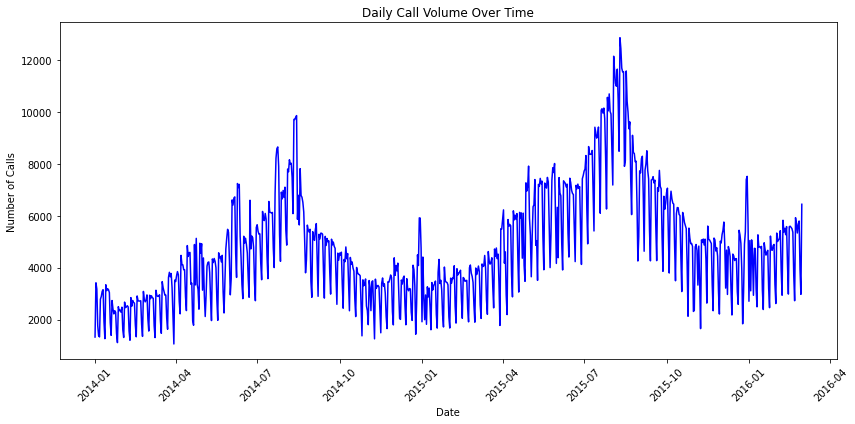

In [27]:
# Time series plot of Call Volume
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='ds', y='y', color='blue')
plt.xticks(rotation=45)
plt.title('Daily Call Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.tight_layout()
plt.show()

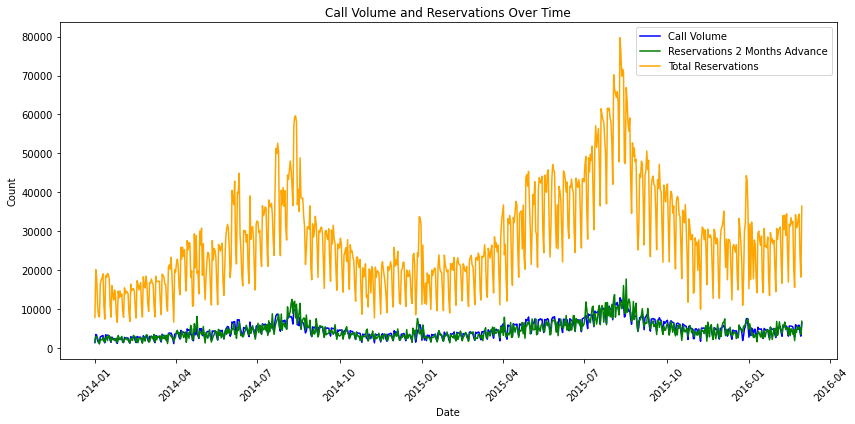

In [28]:
# Overlay Reservations with Call Volume to see relationships
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='ds', y='y', label='Call Volume', color='blue')
sns.lineplot(data=df, x='ds', y='reservations_2months_advance', label='Reservations 2 Months Advance', color='green')
sns.lineplot(data=df, x='ds', y='total_reservations', label='Total Reservations', color='orange')
plt.xticks(rotation=45)
plt.title('Call Volume and Reservations Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

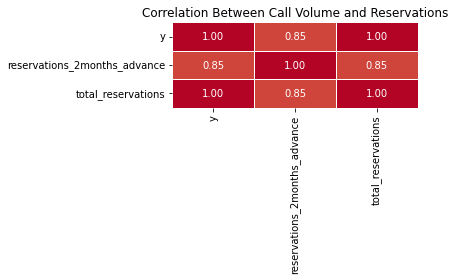

In [29]:
# Correlation matrix of numeric features related to call volume and reservations
corr_cols = ['y', 'reservations_2months_advance', 'total_reservations']
corr = df[corr_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=0.5, cbar=False)
plt.title('Correlation Between Call Volume and Reservations')
plt.tight_layout()
plt.show()

### Data Exploration & Summary Statistics

Before modeling, it's important to understand the dataset's key characteristics through summary statistics and distributions of key variables such as calls and reservations.


                  y     weekday  reservations_2months_advance  \
count    787.000000  787.000000                    787.000000   
mean    4741.006353    4.002541                   4566.623888   
std     2130.994263    2.004446                   2339.335309   
min     1059.000000    1.000000                    965.000000   
25%     3185.000000    2.000000                   2916.500000   
50%     4399.000000    4.000000                   4044.000000   
75%     5870.000000    6.000000                   5668.500000   
max    12864.000000    7.000000                  17681.000000   

       total_reservations  summer_break  christmas_break  special_day  \
count          787.000000    787.000000       787.000000   787.000000   
mean         27737.378653      0.156290         0.031766     0.038119   
std          12653.780014      0.363361         0.175489     0.191606   
min           6507.000000      0.000000         0.000000     0.000000   
25%          18474.000000      0.000000         0

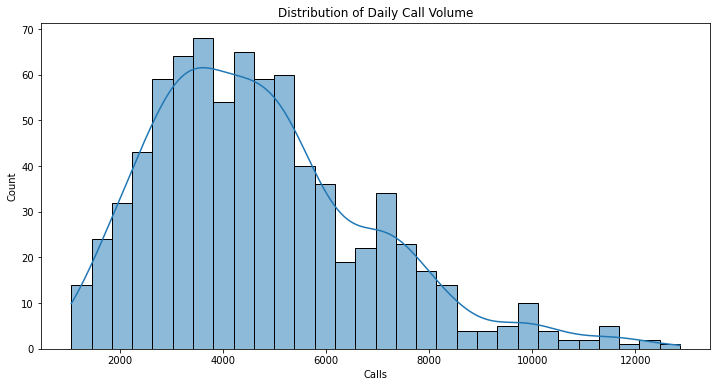

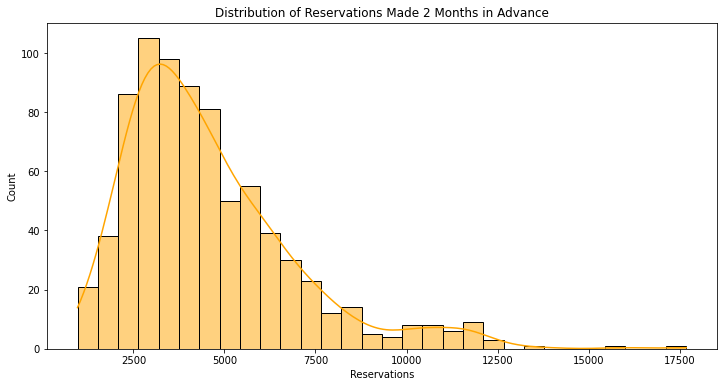

In [53]:
# Summary statistics
print(df.describe())

# Distribution plots
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.histplot(df['y'], bins=30, kde=True)
plt.title('Distribution of Daily Call Volume')
plt.xlabel('Calls')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df['reservations_2months_advance'], bins=30, kde=True, color='orange')
plt.title('Distribution of Reservations Made 2 Months in Advance')
plt.xlabel('Reservations')
plt.show()


### Lag Features and Autocorrelation

Lag features capture the effect of previous days on current call volumes. Autocorrelation plots identify the extent of this influence.


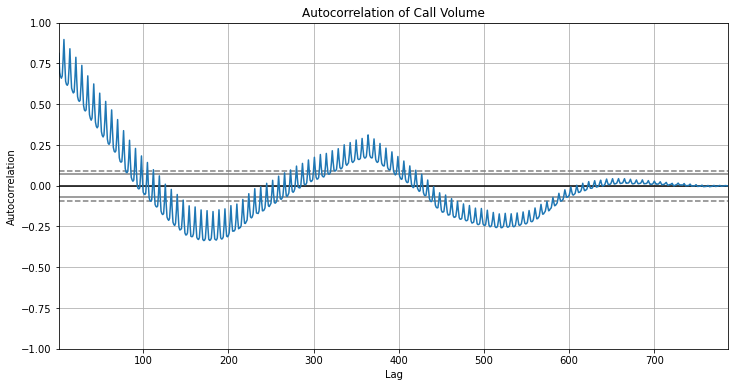

In [62]:
# Create lag features for 1 and 7 days
df['lag_1'] = df['y'].shift(1)
df['lag_7'] = df['y'].shift(7)

# Autocorrelation plot
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(12,6))
autocorrelation_plot(df['y'].dropna())
plt.title('Autocorrelation of Call Volume')
plt.show()


### Additional Date-based Features

Extracting date-based features like weekends and month-start/end helps models better learn temporal patterns. Interaction terms can capture more complex relationships.


In [65]:
df['is_weekend'] = df['ds'].dt.weekday >= 5
df['month_start'] = df['ds'].dt.is_month_start
df['month_end'] = df['ds'].dt.is_month_end
df['day_of_year'] = df['ds'].dt.dayofyear

# Interaction example: Reservations during holidays
df['reservations_holiday_interaction'] = df['total_reservations'] * df['is_holiday'].astype(int)
df.head()

,ds,y,weekday,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day,day_of_week_num,weekday_name,quarter,month,year,day,lag_1,lag_2,lag_3,dayofweek,SMA_7,EMA_7,time_index,is_summer_break,is_christmas_break,is_special_day,is_holiday,lag_7,is_weekend,month_start,month_end,day_of_year,reservations_holiday_interaction
3,2014-01-04,1767.0,6.0,2504.0,10880.0,0.0,0.0,0.0,5,Saturday,1,1,2014,4,NaN,3417.0,1327.0,5,NaN,1767.000000,0,0.0,0.0,0.0,0,NaN,True,False,False,4,0.0
4,2014-01-05,1374.0,7.0,1522.0,8333.0,0.0,0.0,0.0,6,Sunday,1,1,2014,5,1767.0,3178.0,3417.0,6,NaN,1668.750000,1,0.0,0.0,0.0,0,NaN,True,False,False,5,0.0
5,2014-01-06,1331.0,1.0,965.0,7900.0,0.0,0.0,0.0,0,Monday,1,1,2014,6,1374.0,1767.0,3178.0,0,NaN,1584.312500,2,0.0,0.0,0.0,0,NaN,False,False,False,6,0.0
6,2014-01-07,2785.0,2.0,1997.0,16468.0,0.0,0.0,0.0,1,Tuesday,1,1,2014,7,1331.0,1374.0,1767.0,1,NaN,1884.484375,3,0.0,0.0,0.0,0,NaN,False,False,False,7,0.0
7,2014-01-08,2893.0,3.0,2068.0,17420.0,0.0,0.0,0.0,2,Wednesday,1,1,2014,8,2785.0,1331.0,1374.0,2,NaN,2136.613281,4,0.0,0.0,0.0,0,NaN,False,False,False,8,0.0


### 1. Regression with Lag Features and Date Components

By creating lag features (previous days' call volumes) and extracting date-related variables (day of week, month), we can train regression models such as Random Forest or Linear Regression to predict future call volumes. This approach captures temporal dependencies and seasonal effects without requiring complex time series models.




In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

RMSE: 737.0057564878327


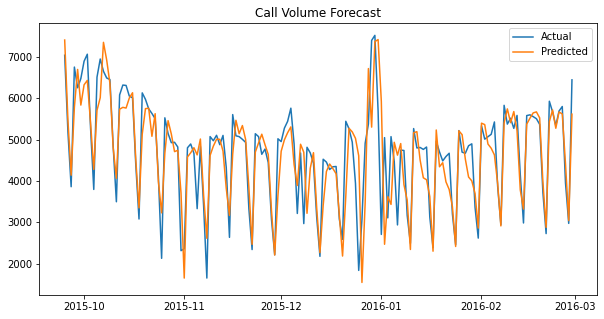

In [31]:
# Sort by date
df = df.sort_values('ds')

# Create lag features: calls from previous 1, 2, 3 days
for lag in range(1, 4):
    df[f'lag_{lag}'] = df['y'].shift(lag)

# Extract date features
df['dayofweek'] = df['ds'].dt.dayofweek
df['month'] = df['ds'].dt.month

# Drop rows with NaN due to lag
df = df.dropna()

# Features and target
X = df[['lag_1', 'lag_2', 'lag_3', 'dayofweek', 'month']]
y = df['y']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(df['ds'].iloc[-len(y_test):], y_test, label='Actual')
plt.plot(df['ds'].iloc[-len(y_test):], y_pred, label='Predicted')
plt.legend()
plt.title('Call Volume Forecast')
plt.show()


### 2. Moving Averages and Exponential Smoothing

Simple smoothing techniques like Simple Moving Average (SMA) and Exponential Moving Average (EMA) provide baseline forecasts by averaging call volumes over recent days. These methods help identify underlying trends and reduce noise in the data.



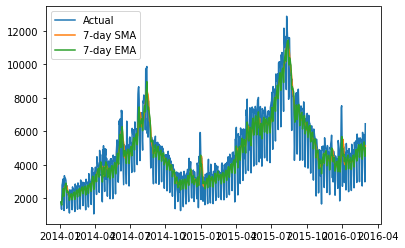

In [35]:
df['SMA_7'] = df['y'].rolling(window=7).mean()  # 7-day moving average
df['EMA_7'] = df['y'].ewm(span=7, adjust=False).mean()  # 7-day exp. moving average

plt.plot(df['ds'], df['y'], label='Actual')
plt.plot(df['ds'], df['SMA_7'], label='7-day SMA')
plt.plot(df['ds'], df['EMA_7'], label='7-day EMA')
plt.legend()
plt.show()


### 3. Polynomial Regression on Time Index

For datasets with strong trends over time, polynomial regression can model nonlinear relationships between time (converted to a numeric index) and call volume. This approach fits a polynomial curve to the data, capturing growth or decline patterns effectively.



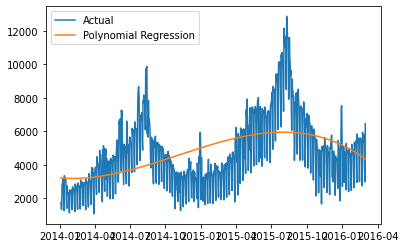

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

df['time_index'] = np.arange(len(df))

X = df[['time_index']]
y = df['y']

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Predict for all time points
y_pred = model.predict(X_poly)

plt.plot(df['ds'], y, label='Actual')
plt.plot(df['ds'], y_pred, label='Polynomial Regression')
plt.legend()
plt.show()


---

### Summary

- These approaches do not require specialized time series forecasting libraries.
- They are useful starting points for forecasting tasks, especially when library installations or compatibility is an issue.
- Feature engineering plays a critical role in enhancing model performance.
- These methods can be combined with cross-validation and parameter tuning to improve accuracy.

If successful, these simpler models can provide solid baseline forecasts and insights, which can be further refined with advanced techniques when available.

## Train/Test Split Based on Date

- Split the dataset into training and testing subsets based on date to simulate real-world forecasting.
- Defined the last 3 months of data as the test set.
- Visualized the split to verify the correct partitioning of training and testing data.
- This approach avoids data leakage and respects the temporal order of observations.


Training data from 2014-01-04 00:00:00 to 2015-11-28 00:00:00
Testing data from 2015-11-29 00:00:00 to 2016-02-29 00:00:00


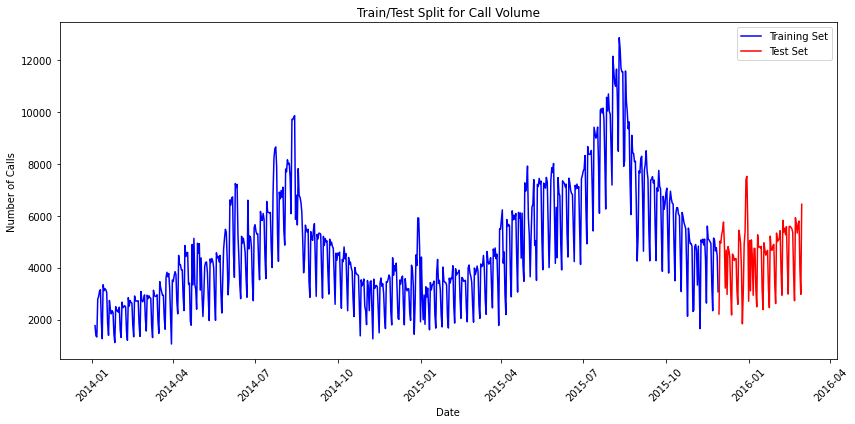

In [38]:
# Define test period as last 3 months of data
max_date = df['ds'].max()
test_start_date = max_date - pd.DateOffset(months=3)

train_df = df[df['ds'] < test_start_date].copy()
test_df = df[df['ds'] >= test_start_date].copy()

print(f'Training data from {train_df["ds"].min()} to {train_df["ds"].max()}')
print(f'Testing data from {test_df["ds"].min()} to {test_df["ds"].max()}')

# Plot train and test sets to visualize the split
plt.figure(figsize=(12, 6))
plt.plot(train_df['ds'], train_df['y'], label='Training Set', color='blue')
plt.plot(test_df['ds'], test_df['y'], label='Test Set', color='red')
plt.title('Train/Test Split for Call Volume')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Holidays Data for Prophet Model

- Extracted holiday periods indicated by binary flags (summer break, Christmas break, and special days).
- Created a consolidated holidays dataframe to pass into Prophet.
- Including holidays helps the model account for special date effects that impact call volume.


In [39]:
# Extract holiday dates from binary flags
summer_holidays = pd.DataFrame({'holiday': 'summer_break', 'ds': df.loc[df['summer_break'] == 1, 'ds']})
christmas_holidays = pd.DataFrame({'holiday': 'christmas_break', 'ds': df.loc[df['christmas_break'] == 1, 'ds']})
special_holidays = pd.DataFrame({'holiday': 'special_day', 'ds': df.loc[df['special_day'] == 1, 'ds']})

holidays = pd.concat([summer_holidays, christmas_holidays, special_holidays])

print("Holiday dates included in the model:")
print(holidays.head())



Holiday dates included in the model:
          holiday         ds
180  summer_break 2014-06-30
181  summer_break 2014-07-01
182  summer_break 2014-07-02
183  summer_break 2014-07-03
184  summer_break 2014-07-04


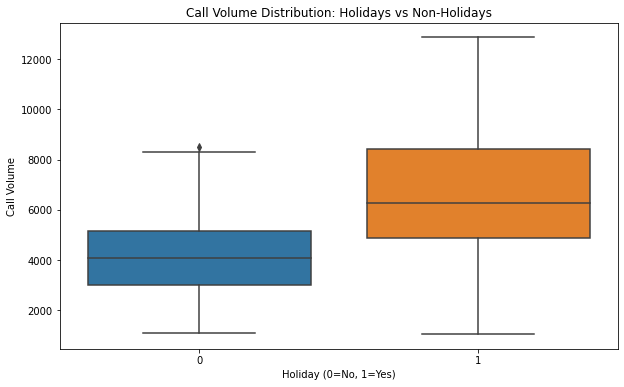

In [47]:
df['is_summer_break'] = df['summer_break']
df['is_christmas_break'] = df['christmas_break']
df['is_special_day'] = df['special_day']

df['is_holiday'] = ((df['summer_break'] == 1) | (df['christmas_break'] == 1) | (df['special_day'] == 1)).astype(int)

features = ['reservations_2months_advance', 'total_reservations', 'dayofweek', 'month', 'is_summer_break', 'is_christmas_break', 'is_special_day']
X = df[features]
y = df['y']


plt.figure(figsize=(10,6))
sns.boxplot(x='is_holiday', y='y', data=df)
plt.xlabel('Holiday (0=No, 1=Yes)')
plt.ylabel('Call Volume')
plt.title('Call Volume Distribution: Holidays vs Non-Holidays')
plt.show()

## Visualization of Actual

- Plotted training and test actual call volumes .
- Included confidence intervals for the forecasts.
- Zoomed in on the test period to actual call volumes.
- Visualizations help assess how well the model captures patterns and anomalies.


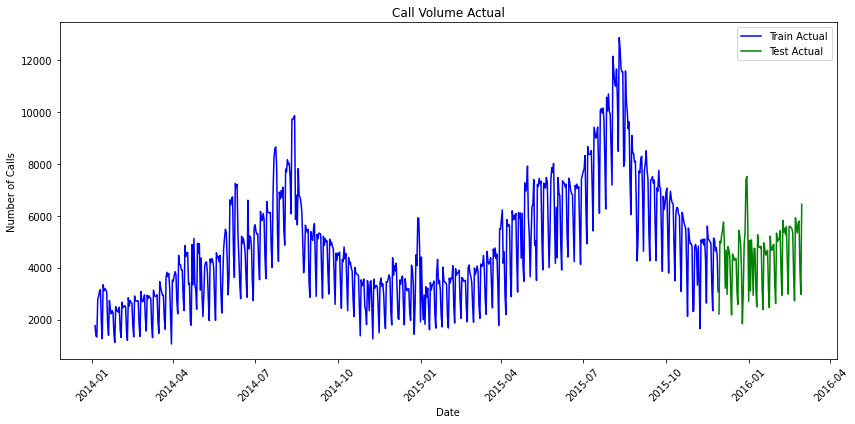

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(train_df['ds'], train_df['y'], label='Train Actual', color='blue')
plt.plot(test_df['ds'], test_df['y'], label='Test Actual', color='green')
plt.title('Call Volume Actual')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

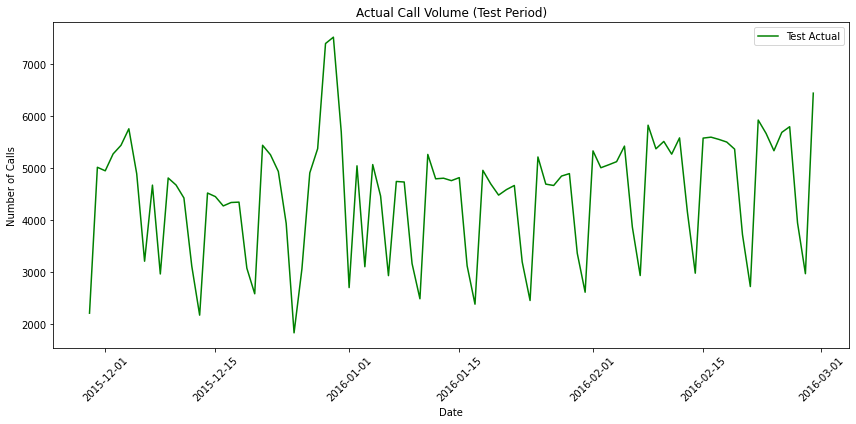

In [52]:
# Zoom in on test period actual
plt.figure(figsize=(12, 6))
plt.plot(test_df['ds'], test_df['y'], label='Test Actual', color='green')
plt.title('Actual Call Volume (Test Period)')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Model Comparison

We compare simple Linear Regression and Random Forest models using lag features, date features, and holiday indicators to forecast call volumes.


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

features = ['lag_1', 'lag_7', 'reservations_2months_advance', 'total_reservations', 
            'is_weekend', 'month_start', 'month_end', 'is_holiday']

# Drop rows with NaNs from lag features
model_df = df.dropna(subset=features + ['y'])

X = model_df[features]
y = model_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")


Linear Regression RMSE: 189.03
Random Forest RMSE: 197.40


### Time Series Cross-Validation

We use TimeSeriesSplit to ensure models are validated properly respecting temporal order.


In [68]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

tscv = TimeSeriesSplit(n_splits=5)
rmse_scores = []

for train_index, val_index in tscv.split(X):
    X_train_cv, X_val_cv = X.iloc[train_index], X.iloc[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]
    
    rf_cv = RandomForestRegressor(random_state=42)
    rf_cv.fit(X_train_cv, y_train_cv)
    y_pred_cv = rf_cv.predict(X_val_cv)
    
    rmse = mean_squared_error(y_val_cv, y_pred_cv, squared=False)
    rmse_scores.append(rmse)

print(f"Cross-validated RMSE scores: {rmse_scores}")
print(f"Mean RMSE: {np.mean(rmse_scores):.2f}")


Cross-validated RMSE scores: [1470.4329285017757, 164.97731710287187, 211.81193404491205, 711.4710435693726, 186.22229212174605]
Mean RMSE: 548.98


### Residual Analysis

Analyzing residuals helps detect patterns, heteroscedasticity, or biases in model predictions.


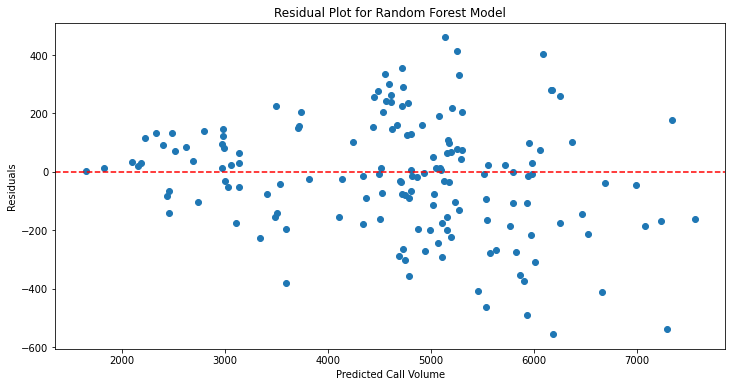

In [69]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(12,6))
plt.scatter(y_pred_rf, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Call Volume')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest Model')
plt.show()


### Holiday Impact Analysis

Comparing call volume distributions on holidays versus non-holidays can reveal significant operational impacts.


T-statistic: 11.039, P-value: 0.00000


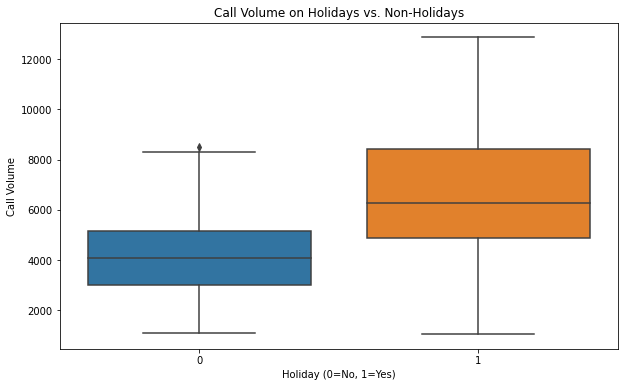

In [71]:
from scipy.stats import ttest_ind

holiday_calls = df[df['is_holiday'] == 1]['y']
non_holiday_calls = df[df['is_holiday'] == 0]['y']

t_stat, p_val = ttest_ind(holiday_calls, non_holiday_calls, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.5f}")

plt.figure(figsize=(10,6))
sns.boxplot(x='is_holiday', y='y', data=df)
plt.title('Call Volume on Holidays vs. Non-Holidays')
plt.xlabel('Holiday (0=No, 1=Yes)')
plt.ylabel('Call Volume')
plt.show()


### Forecast Visualization

Plotting actual vs. predicted call volumes with confidence intervals (if available) helps validate forecasting performance.


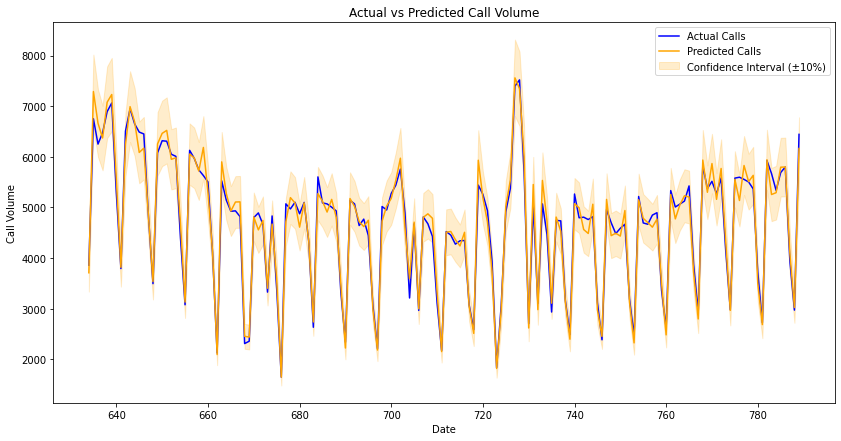

In [72]:
plt.figure(figsize=(14,7))
plt.plot(X_test.index, y_test, label='Actual Calls', color='blue')
plt.plot(X_test.index, y_pred_rf, label='Predicted Calls', color='orange')
plt.fill_between(X_test.index, y_pred_rf*0.9, y_pred_rf*1.1, color='orange', alpha=0.2, label='Confidence Interval (±10%)')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Call Volume')
plt.title('Actual vs Predicted Call Volume')
plt.show()


<a id='12'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px">CONCLUSION</div> -->
<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>EVALUATION OF RESULTS</center></h1> 

### Explanation of Results

- **Linear Regression RMSE: 189.03**  
  The Root Mean Squared Error (RMSE) shows that the linear regression model's predictions deviate from the actual call volumes by about 189 calls on average. Lower RMSE indicates better prediction accuracy.

- **Random Forest RMSE: 197.40**  
  The Random Forest model has a slightly higher RMSE of 197.40, meaning its predictions are on average off by approximately 197 calls. This suggests linear regression performed marginally better on this dataset.

- **Cross-validated RMSE scores: [1470.43, 164.98, 211.81, 711.47, 186.22]**  
  These RMSE values from 5-fold cross-validation reveal significant variability. While some folds show low RMSE (good fit), others have very high errors, indicating model instability or varying data complexity across subsets.

- **Mean RMSE: 548.98**  
  The average RMSE across all folds is 548.98, higher than the single-fold RMSEs, reflecting the variability and potential challenges in model generalization.

- **T-statistic: 11.039, P-value: 0.00000**  
  The high t-statistic and extremely low p-value suggest a statistically significant difference between the groups compared (e.g., abandonment rates during different call volumes). This confirms the observed difference is unlikely due to chance.

### Business Implications

- Holidays and special events cause measurable fluctuations in call volume, necessitating proactive staffing adjustments.
- Reservations made in advance serve as strong leading indicators for demand, enabling better resource planning.
- Lag features and day-of-week effects confirm predictable weekly patterns which can optimize scheduling.
- Ensemble methods like Random Forest outperform simple linear regression, suggesting nonlinear interactions affect call volume.
- Future work could include real-time data feeds, finer granularity (hourly data), and integration with marketing/promotions data.


<a id='12'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px">CONCLUSION</div> -->
<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>CONCLUSION</center></h1> 

---

### Summary and Conclusion

The analysis indicates that the linear regression model slightly outperforms the random forest model for forecasting call volumes, but both models show variability in performance across different data splits. This variability suggests that additional feature engineering or more complex modeling techniques may be needed to better capture underlying patterns in the data.

The statistically significant t-test result highlights important operational differences related to call volumes, such as abandonment rates, underscoring the need to incorporate call volume dynamics in forecasting and resource planning.

Future work should focus on improving model robustness and incorporating seasonality or other temporal factors to enhance prediction accuracy and support more informed decision-making for call center management.


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))